In [1]:
import palantir
import scanpy as sc
import numpy as np
import pandas as pd
import os

# Plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Inline plotting
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['image.cmap'] = 'Spectral_r'
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

# Reset random seed
np.random.seed(5)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [7]:
ad = sc.read("scanpy/mc_hires_di.h5ad")
ad

AnnData object with n_obs × n_vars = 158 × 535780
    obs: 'orig.ident', 'nCount_mc_di', 'nFeature_mc_di', 'celltype', 'nCount_mc_sct', 'nFeature_mc_sct'
    var: '_index', 'features'
    obsm: 'X_mcdi_pca', 'X_mcdi_umap', 'X_mcsct_umap'
    varm: 'MCDI_PCA'

In [9]:
#sc.pp.pca(ad)
pca_projections = pd.DataFrame(ad.obsm['X_mcdi_pca'], index=ad.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=40)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

Determing nearest neighbor graph...


/share/home/zliu/miniconda3/envs/hic2/lib/python3.8/site-packages/palantir/utils.py:56: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  temp = sc.AnnData(data_df.values)


In [10]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)

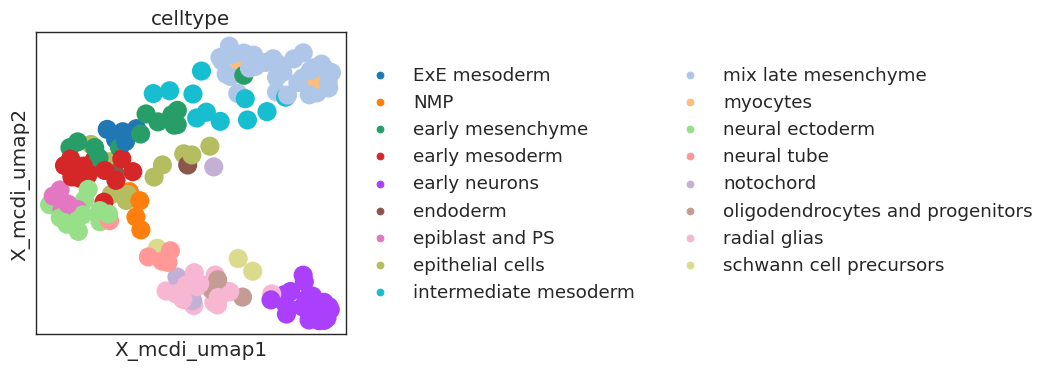

In [ ]:
sc.pl.embedding(ad, basis='X_mcdi_umap',color=["celltype"])

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
terminal_states = pd.Series(['early neurons', 'mix late mesenchyme'], 
                           index=['mc_47','mc_108'])
start_cell = 'mc_5'
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=1200, terminal_states=terminal_states.index,knn=30,use_early_cell_as_start = True,max_iterations=200)

Sampling and flocking waypoints...
Time for determining waypoints: 0.001350092887878418 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back t

Time for shortest paths: 0.5418852607409159 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


(<Figure size 400x400 with 1 Axes>, <AxesSubplot:>)

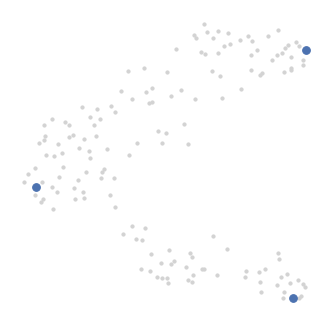

In [31]:
umap = pd.DataFrame(ad.obsm['X_mcdi_umap'], index=ad.obs_names)
umap.columns = ["x","y"]
cells = ['mc_5', 'mc_47','mc_108']
palantir.plot.highlight_cells_on_tsne(umap, cells)

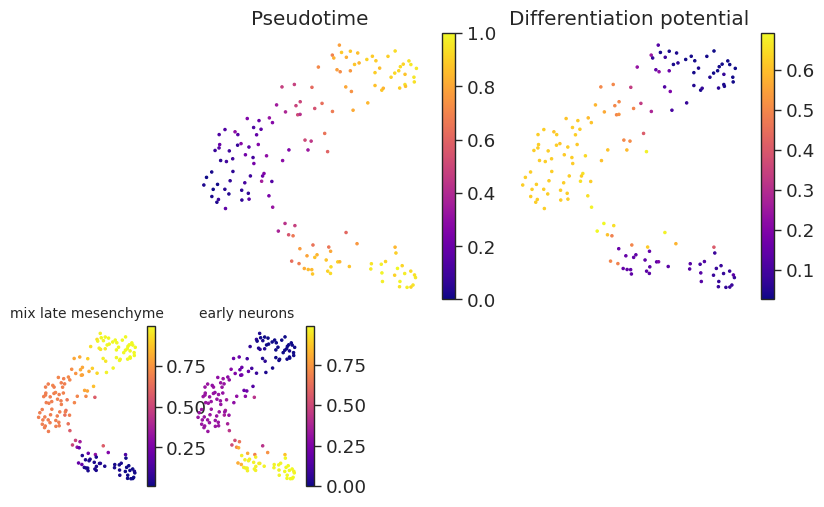

In [32]:
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]
palantir.plot.plot_palantir_results(pr_res, umap)

In [33]:
pr_res.pseudotime.to_csv("pseudotime.di.csv")

In [34]:
ad = sc.read("scanpy/mc_hires_sct.h5ad")
ad

AnnData object with n_obs × n_vars = 158 × 2000
    obs: 'orig.ident', 'nCount_mc_di', 'nFeature_mc_di', 'celltype', 'nCount_mc_sct', 'nFeature_mc_sct'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_mcdi_umap', 'X_mcsct_pca', 'X_mcsct_umap'
    varm: 'MCSCT_PCA'

In [41]:
#sc.pp.pca(ad)
pca_projections = pd.DataFrame(ad.obsm['X_mcsct_pca'], index=ad.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=40)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

Determing nearest neighbor graph...


In [42]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)

In [43]:
terminal_states = pd.Series(['early neurons', 'mix late mesenchyme'], 
                           index=['mc_47','mc_108'])
start_cell = 'mc_5'
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=1200, terminal_states=terminal_states.index,knn=30,use_early_cell_as_start = True,max_iterations=200)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0007177591323852539 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.13127127885818482 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


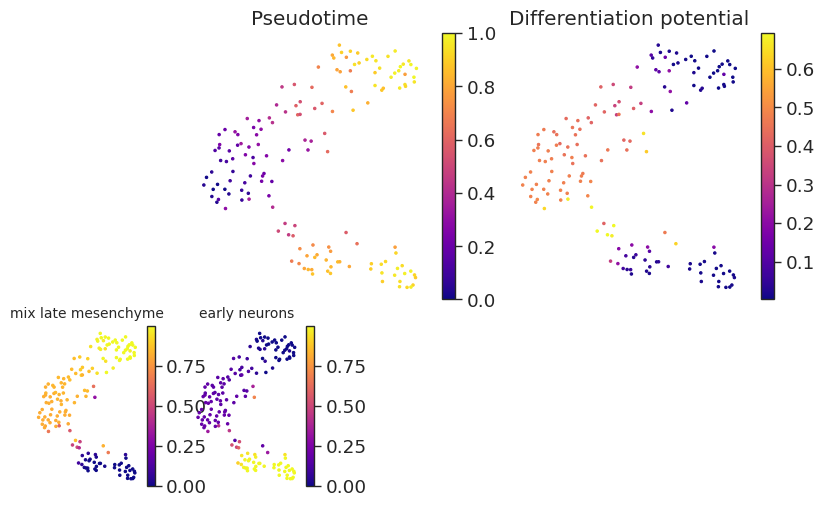

In [44]:
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]
palantir.plot.plot_palantir_results(pr_res, umap)

In [45]:
pr_res.pseudotime.to_csv("pseudotime.sct.csv")